# The aim of this project is to answer questions about visual pollution complaints in Ministry of Municipal and Rural Affairs and Housing 

** before cells i will make markdown to explain the step ** 

In [175]:

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 

import arabic_reshaper
from bidi.algorithm import get_display

def render_arabic(text: str) -> str:
    return get_display(arabic_reshaper.reshape(text))

In [176]:
df= pd.read_parquet('/Users/ibrahim/Downloads/940-complaints-2022.pq')

In [177]:
df.head()

,الأمانة,البلدية,المحاور,التصنيف التخصصي,حالات البلاغات,حالة الرضا,تاريخ الإنشاء,تاريخ الإغلاق
0,أمانة منطقة الرياض,أمانة منطقة الرياض,الأرصفة المتهالكة,صيانة الأرصفة,مسدد,راضي,10-01-22,10/02/2022
1,أمانة منطقة الرياض,أمانة منطقة الرياض,الهدم والبناء,مخلفات الهدم والبناء,مسدد,راضي,10-01-22,10/02/2022
2,أمانة منطقة الرياض,أمانة منطقة الرياض,حفر الشوارع,صيانة اسفلت,مسدد,غير مقيم,10-01-22,10/02/2022
3,أمانة منطقة الرياض,بلدية تمير,حفر الشوارع,صيانة اسفلت,مسدد,غير مقيم,10-01-22,10/06/2022
4,أمانة منطقة الرياض,أمانة منطقة الرياض,السيارات التالفة و المهملة,السيارات التالفة و مخلفات حوادث السيارات,مسدد,غير مقيم,10-01-22,11/07/2022


In [178]:
display(df['الأمانة'].value_counts().sum())
display(df['البلدية'].value_counts().sum())


1533235

1533235

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533235 entries, 0 to 1533234
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   الأمانة          1533235 non-null  object
 1   البلدية          1533235 non-null  object
 2   المحاور          1533235 non-null  object
 3   التصنيف التخصصي  1533235 non-null  object
 4   حالات البلاغات   1533235 non-null  object
 5   حالة الرضا       1533235 non-null  object
 6   تاريخ الإنشاء    1533235 non-null  object
 7   تاريخ الإغلاق    1533235 non-null  object
dtypes: object(8)
memory usage: 93.6+ MB


In [180]:
df.describe()

,الأمانة,البلدية,المحاور,التصنيف التخصصي,حالات البلاغات,حالة الرضا,تاريخ الإنشاء,تاريخ الإغلاق
count,1533235,1533235,1533235,1533235,1533235,1533235,1533235,1533235
unique,18,335,13,107,5,4,365,384
top,أمانة منطقة الرياض,أمانة منطقة الرياض,النظافة العامة,نفايات او مبعثرات بالشارع,مسدد,غير مقيم,08-23-22,09/07/2022
freq,367363,300141,578802,171982,1463542,1026836,7514,107074


In [181]:
# change the Dtype to date
df['تاريخ الإنشاء'] = pd.to_datetime(df['تاريخ الإنشاء'])
df['تاريخ الإغلاق'] = pd.to_datetime(df['تاريخ الإغلاق'], errors='coerce')

In [182]:
df.head()

,الأمانة,البلدية,المحاور,التصنيف التخصصي,حالات البلاغات,حالة الرضا,تاريخ الإنشاء,تاريخ الإغلاق
0,أمانة منطقة الرياض,أمانة منطقة الرياض,الأرصفة المتهالكة,صيانة الأرصفة,مسدد,راضي,2022-10-01,2022-10-02
1,أمانة منطقة الرياض,أمانة منطقة الرياض,الهدم والبناء,مخلفات الهدم والبناء,مسدد,راضي,2022-10-01,2022-10-02
2,أمانة منطقة الرياض,أمانة منطقة الرياض,حفر الشوارع,صيانة اسفلت,مسدد,غير مقيم,2022-10-01,2022-10-02
3,أمانة منطقة الرياض,بلدية تمير,حفر الشوارع,صيانة اسفلت,مسدد,غير مقيم,2022-10-01,2022-10-06
4,أمانة منطقة الرياض,أمانة منطقة الرياض,السيارات التالفة و المهملة,السيارات التالفة و مخلفات حوادث السيارات,مسدد,غير مقيم,2022-10-01,2022-11-07


In [183]:
# deleting closed coplaints that are missing closed date
clo = df['حالات البلاغات']=='مسدد'
date_f =  df['تاريخ الإغلاق'].isna()
inv = (clo & date_f)
df = df[~inv]

In [184]:
df['الأمانة'].value_counts()

أمانة منطقة الرياض             367259
أمانة محافظة جدة               263089
أمانة منطقة عسير               125979
أمانة المدينة المنورة          101125
أمانة جازان                    101104
أمانة القصيم                    93523
أمانة العاصمة المقدسة           69842
أمانة منطقة حائل                62832
أمانة محافظة الاحساء            57789
أمانة الطائف                    55475
أمانة المنطقة الشرقية           53168
أمانة منطقة تبوك                35424
أمانة حفرالباطن                 31073
أمانة منطقة الجوف               27071
أمانة منطقة نجران               22675
أمانة الباحة                    18481
أمانة منطقة الحدود الشمالية     10518
الهيئة الملكية بالعلا             864
Name: الأمانة, dtype: int64

In [185]:
df['البلدية'].value_counts().sum()

1497291

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1497291 entries, 0 to 1533234
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   الأمانة          1497291 non-null  object        
 1   البلدية          1497291 non-null  object        
 2   المحاور          1497291 non-null  object        
 3   التصنيف التخصصي  1497291 non-null  object        
 4   حالات البلاغات   1497291 non-null  object        
 5   حالة الرضا       1497291 non-null  object        
 6   تاريخ الإنشاء    1497291 non-null  datetime64[ns]
 7   تاريخ الإغلاق    1431350 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(6)
memory usage: 102.8+ MB


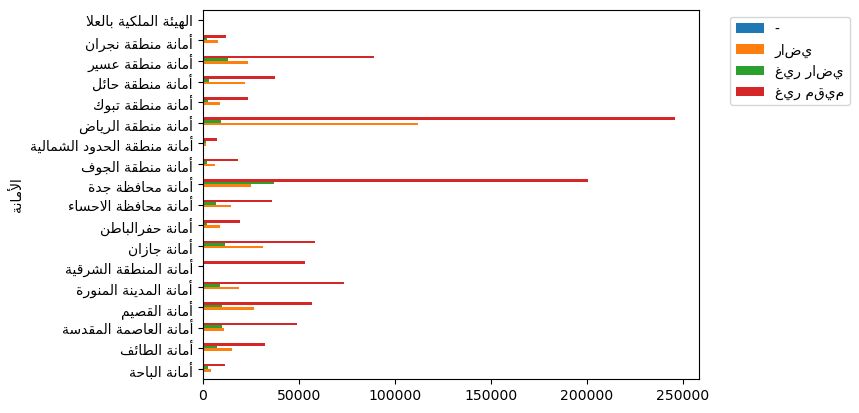

In [187]:
P = df.groupby(['الأمانة', 'حالة الرضا']).size().unstack()
P =P.reset_index()

munc = render_arabic('الأمانة')
rati = render_arabic('حالة الرضا')

P['الأمانة'] = P['الأمانة'].apply(render_arabic)
#P['حالة الرضا'] = P['حالة الرضا'].apply(render_arabic)

P = P.rename(columns={'الأمانة': munc})
P = P.rename(columns={'حالة الرضا': rati})


ax = P.plot(kind='barh',x=munc)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



We see most of the complaints unrated so i will create new equation see performance of each امانه

### I will start the score measure for each 'امانه'

the closed case under the average closed of this 'محور' will count = 1 , more than the average will be counted = 0 
if the rating 'غير راضي' counted = -1 , 'راضي' will be = 1, 
if the case is reopend will counted -1



using this score measure i can tell what امانه is better

In [188]:
Scoring = df.copy()

In [189]:
#count how many day works 
dur = Scoring['تاريخ الإغلاق']- Scoring['تاريخ الإنشاء']
Scoring['dur_day']= dur.map(lambda r: r.total_seconds()/60/60/24)
Scoring.head()

,الأمانة,البلدية,المحاور,التصنيف التخصصي,حالات البلاغات,حالة الرضا,تاريخ الإنشاء,تاريخ الإغلاق,dur_day
0,أمانة منطقة الرياض,أمانة منطقة الرياض,الأرصفة المتهالكة,صيانة الأرصفة,مسدد,راضي,2022-10-01,2022-10-02,1.0
1,أمانة منطقة الرياض,أمانة منطقة الرياض,الهدم والبناء,مخلفات الهدم والبناء,مسدد,راضي,2022-10-01,2022-10-02,1.0
2,أمانة منطقة الرياض,أمانة منطقة الرياض,حفر الشوارع,صيانة اسفلت,مسدد,غير مقيم,2022-10-01,2022-10-02,1.0
3,أمانة منطقة الرياض,بلدية تمير,حفر الشوارع,صيانة اسفلت,مسدد,غير مقيم,2022-10-01,2022-10-06,5.0
4,أمانة منطقة الرياض,أمانة منطقة الرياض,السيارات التالفة و المهملة,السيارات التالفة و مخلفات حوادث السيارات,مسدد,غير مقيم,2022-10-01,2022-11-07,37.0


In [190]:
Scoring['حالة الرضا'] = Scoring['حالة الرضا'].replace({
    'راضي': 1,
    'غير مقيم': 0,
    'غير راضي': -1
})

Scoring['حالات البلاغات'] = Scoring['حالات البلاغات'].replace({
    'مسدد': 0,
    'جديد': 0,
    'معاد فتح': -1,
    'قيد التنفيذ': 0
})

In [191]:
#average day work of each محور with all saudi امانه
grouped = Scoring.groupby(['المحاور'])['dur_day'].mean()

grouped

المحاور
أعمدة الإنارة                 20.886937
الأرصفة المتهالكة             26.497542
البناء النظيف                 21.482736
الحدائق والمنتزهات             9.461732
السيارات التالفة و المهملة    14.803831
الطرق                         20.648437
اللوحات الارشادية             25.147097
النظافة العامة                 8.151293
الهدم والبناء                  6.161386
حفر الشوارع                   30.735384
حواجز الحفريات                36.569143
رسوم الجدران                  27.101210
مخلفات الهدم والبناء          15.562936
Name: dur_day, dtype: float64

In [192]:
for t in Scoring['المحاور'].unique() :
    Scoring.loc[Scoring['المحاور'] ==t, 'avg'] =  grouped[t]
Scoring.head()

,الأمانة,البلدية,المحاور,التصنيف التخصصي,حالات البلاغات,حالة الرضا,تاريخ الإنشاء,تاريخ الإغلاق,dur_day,avg
0,أمانة منطقة الرياض,أمانة منطقة الرياض,الأرصفة المتهالكة,صيانة الأرصفة,0,1,2022-10-01,2022-10-02,1.0,26.497542
1,أمانة منطقة الرياض,أمانة منطقة الرياض,الهدم والبناء,مخلفات الهدم والبناء,0,1,2022-10-01,2022-10-02,1.0,6.161386
2,أمانة منطقة الرياض,أمانة منطقة الرياض,حفر الشوارع,صيانة اسفلت,0,0,2022-10-01,2022-10-02,1.0,30.735384
3,أمانة منطقة الرياض,بلدية تمير,حفر الشوارع,صيانة اسفلت,0,0,2022-10-01,2022-10-06,5.0,30.735384
4,أمانة منطقة الرياض,أمانة منطقة الرياض,السيارات التالفة و المهملة,السيارات التالفة و مخلفات حوادث السيارات,0,0,2022-10-01,2022-11-07,37.0,14.803831


In [193]:
#if its late will count 0 else 1
Scoring['in_time']= Scoring['dur_day']<= Scoring['avg']
Scoring["in_time"] = Scoring["in_time"].astype(int)

Scoring.head()

,الأمانة,البلدية,المحاور,التصنيف التخصصي,حالات البلاغات,حالة الرضا,تاريخ الإنشاء,تاريخ الإغلاق,dur_day,avg,in_time
0,أمانة منطقة الرياض,أمانة منطقة الرياض,الأرصفة المتهالكة,صيانة الأرصفة,0,1,2022-10-01,2022-10-02,1.0,26.497542,1
1,أمانة منطقة الرياض,أمانة منطقة الرياض,الهدم والبناء,مخلفات الهدم والبناء,0,1,2022-10-01,2022-10-02,1.0,6.161386,1
2,أمانة منطقة الرياض,أمانة منطقة الرياض,حفر الشوارع,صيانة اسفلت,0,0,2022-10-01,2022-10-02,1.0,30.735384,1
3,أمانة منطقة الرياض,بلدية تمير,حفر الشوارع,صيانة اسفلت,0,0,2022-10-01,2022-10-06,5.0,30.735384,1
4,أمانة منطقة الرياض,أمانة منطقة الرياض,السيارات التالفة و المهملة,السيارات التالفة و مخلفات حوادث السيارات,0,0,2022-10-01,2022-11-07,37.0,14.803831,0


In [194]:
Scoring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1497291 entries, 0 to 1533234
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   الأمانة          1497291 non-null  object        
 1   البلدية          1497291 non-null  object        
 2   المحاور          1497291 non-null  object        
 3   التصنيف التخصصي  1497291 non-null  object        
 4   حالات البلاغات   1497291 non-null  object        
 5   حالة الرضا       1497291 non-null  object        
 6   تاريخ الإنشاء    1497291 non-null  datetime64[ns]
 7   تاريخ الإغلاق    1431350 non-null  datetime64[ns]
 8   dur_day          1431350 non-null  float64       
 9   avg              1497291 non-null  float64       
 10  in_time          1497291 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 137.1+ MB


In [195]:
#deleting unclosed case because i cant measure the performance of unclosed cases
Scoring = Scoring[~Scoring['dur_day'].isna()]

In [196]:
Scoring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431350 entries, 0 to 1533234
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   الأمانة          1431350 non-null  object        
 1   البلدية          1431350 non-null  object        
 2   المحاور          1431350 non-null  object        
 3   التصنيف التخصصي  1431350 non-null  object        
 4   حالات البلاغات   1431350 non-null  object        
 5   حالة الرضا       1431350 non-null  object        
 6   تاريخ الإنشاء    1431350 non-null  datetime64[ns]
 7   تاريخ الإغلاق    1431350 non-null  datetime64[ns]
 8   dur_day          1431350 non-null  float64       
 9   avg              1431350 non-null  float64       
 10  in_time          1431350 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 131.0+ MB


In [197]:
Scoring['total_Score'] = Scoring['حالة الرضا'] + Scoring['حالات البلاغات'] + Scoring['in_time']

In [198]:
Scoring.head()

,الأمانة,البلدية,المحاور,التصنيف التخصصي,حالات البلاغات,حالة الرضا,تاريخ الإنشاء,تاريخ الإغلاق,dur_day,avg,in_time,total_Score
0,أمانة منطقة الرياض,أمانة منطقة الرياض,الأرصفة المتهالكة,صيانة الأرصفة,0,1,2022-10-01,2022-10-02,1.0,26.497542,1,2
1,أمانة منطقة الرياض,أمانة منطقة الرياض,الهدم والبناء,مخلفات الهدم والبناء,0,1,2022-10-01,2022-10-02,1.0,6.161386,1,2
2,أمانة منطقة الرياض,أمانة منطقة الرياض,حفر الشوارع,صيانة اسفلت,0,0,2022-10-01,2022-10-02,1.0,30.735384,1,1
3,أمانة منطقة الرياض,بلدية تمير,حفر الشوارع,صيانة اسفلت,0,0,2022-10-01,2022-10-06,5.0,30.735384,1,1
4,أمانة منطقة الرياض,أمانة منطقة الرياض,السيارات التالفة و المهملة,السيارات التالفة و مخلفات حوادث السيارات,0,0,2022-10-01,2022-11-07,37.0,14.803831,0,0


i see now total score 2 means its good enough

In [199]:
Scoring[(Scoring['حالات البلاغات'] == -1 ) & (Scoring['حالة الرضا']==1)]

,الأمانة,البلدية,المحاور,التصنيف التخصصي,حالات البلاغات,حالة الرضا,تاريخ الإنشاء,تاريخ الإغلاق,dur_day,avg,in_time,total_Score
793788,أمانة محافظة جدة,أمانة محافظة جدة,حفر الشوارع,اصلاح الحفر و صيانة المطبات,-1,1,2022-04-03,2022-08-01,120.0,30.735384,0,0


 there is just one case that is reopend and the rating is (راضي) interesting !! but it will not change anything because 1/1431350 is nothing

In [200]:
score_m = Scoring.groupby(['الأمانة'])['total_Score'].sum()
count_ca = Scoring.groupby(['الأمانة']).المحاور.count()

display(score_m)
display(count_ca)

الأمانة
أمانة الباحة                    18336
أمانة الطائف                    62503
أمانة العاصمة المقدسة           63585
أمانة القصيم                   109393
أمانة المدينة المنورة           79803
أمانة المنطقة الشرقية           20059
أمانة جازان                    116634
أمانة حفرالباطن                 35995
أمانة محافظة الاحساء            59882
أمانة محافظة جدة               156282
أمانة منطقة الجوف               28288
أمانة منطقة الحدود الشمالية      9023
أمانة منطقة الرياض             372350
أمانة منطقة تبوك                39694
أمانة منطقة حائل                65320
أمانة منطقة عسير               130406
أمانة منطقة نجران               27723
الهيئة الملكية بالعلا             609
Name: total_Score, dtype: object

الأمانة
أمانة الباحة                    18445
أمانة الطائف                    55316
أمانة العاصمة المقدسة           68774
أمانة القصيم                    93365
أمانة المدينة المنورة           94242
أمانة المنطقة الشرقية           45012
أمانة جازان                    100995
أمانة حفرالباطن                 30952
أمانة محافظة الاحساء            57448
أمانة محافظة جدة               231729
أمانة منطقة الجوف               26817
أمانة منطقة الحدود الشمالية     10469
أمانة منطقة الرياض             351660
أمانة منطقة تبوك                35357
أمانة منطقة حائل                61743
أمانة منطقة عسير               125745
أمانة منطقة نجران               22633
الهيئة الملكية بالعلا             648
Name: المحاور, dtype: int64

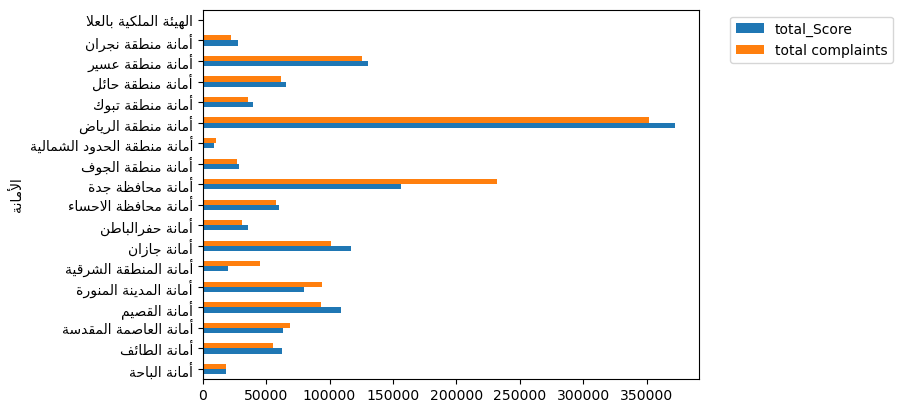

In [201]:


Plot = pd.merge(score_m, count_ca, on='الأمانة').reset_index()

muncipality = render_arabic('الأمانة')
Plot['الأمانة'] = Plot['الأمانة'].apply(render_arabic)
Plot = Plot.rename(columns={'الأمانة': muncipality})
Plot = Plot.rename(columns={'المحاور': 'total complaints'})


ax = Plot.plot(kind='barh',x=muncipality)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

We see that in 
منطقة الحدود الشمالية,
محافظة جدة,
المنطقة الشرقية,
المدينة المنورة,
العاصمة المقدسة,
امانة الباحة 
the score is below the total complaints ( ** it means that the services they give is not good **)


## i will fouces in jeddah to see where is the issue 

In [202]:
jeddah = Scoring[Scoring['الأمانة']=='أمانة محافظة جدة']
jeddah['المحاور'].value_counts()

النظافة العامة                105652
أعمدة الإنارة                  29570
حفر الشوارع                    26319
مخلفات الهدم والبناء           17995
السيارات التالفة و المهملة     15964
الحدائق والمنتزهات             10492
رسوم الجدران                    8837
البناء النظيف                   5730
حواجز الحفريات                  4772
الأرصفة المتهالكة               2985
الطرق                           2909
اللوحات الارشادية                504
Name: المحاور, dtype: int64

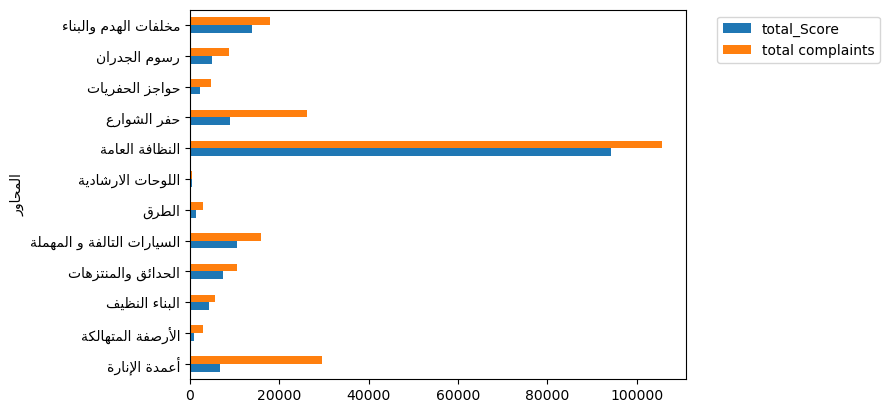

In [203]:
score_m = jeddah.groupby(['المحاور'])['total_Score'].sum()
count_ca = jeddah.groupby(['المحاور']).count()['الأمانة']

Plot = pd.merge(score_m, count_ca, on='المحاور').reset_index()
Plot.head()

cat = render_arabic('المحاور')
Plot['المحاور'] = Plot['المحاور'].apply(render_arabic)
Plot = Plot.rename(columns={'المحاور': cat})
Plot = Plot.rename(columns={'الأمانة': 'total complaints'})


ax = Plot.plot(kind='barh', x=cat)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

the service in jeddah is not good !! 
all of the scores is below than complaints

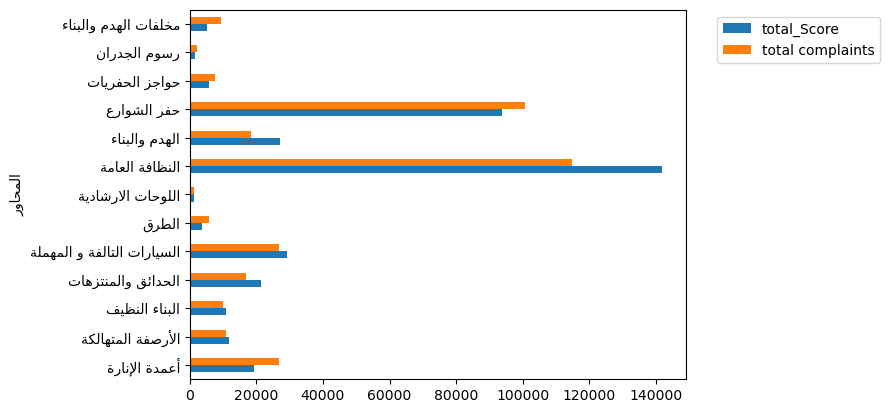

In [204]:
riyadh = Scoring[Scoring['الأمانة']=='أمانة منطقة الرياض']
riyadh['المحاور'].value_counts()

score_m = riyadh.groupby(['المحاور'])['total_Score'].sum()
count_ca = riyadh.groupby(['المحاور']).count()['الأمانة']

Plot = pd.merge(score_m, count_ca, on='المحاور').reset_index()
Plot.head()

cat = render_arabic('المحاور')
Plot['المحاور'] = Plot['المحاور'].apply(render_arabic)
Plot = Plot.rename(columns={'المحاور': cat})
Plot = Plot.rename(columns={'الأمانة': 'total complaints'})


ax = Plot.plot(kind='barh', x=cat)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

in Riyadh we see that there is big difference with jeddah, there is 7 محاور has more score than complaints

i will check the difference between jeddah and riyadh how much is delayed compared avg day work

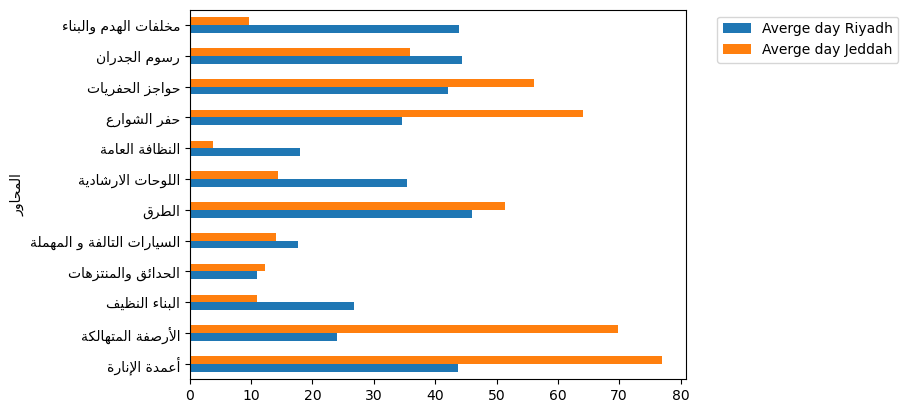

In [205]:
# i will get avg days from riyadh 
riya = riyadh.groupby(['المحاور'])['dur_day'].mean().reset_index()
# i will get avg days from jeddah 
jedd = jeddah.groupby('المحاور')['dur_day'].mean().reset_index()

com = pd.merge(riya, jedd, on='المحاور')
com = com.rename(columns={'dur_day_x': 'Averge day Riyadh', 'dur_day_y': 'Averge day Jeddah'})

cat = render_arabic('المحاور')
com['المحاور'] = com['المحاور'].apply(render_arabic)
com = com.rename(columns={'المحاور': cat})

ax = com.plot(kind='barh', x=cat)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

we can see that 
النظافة العامة                105652
أعمدة الإنارة                  29570
حفر الشوارع                    26319
is the highest complience in jeddah also we see that in jeddah is huge diffreance with riyadh, more than 80% longer time!! maybe this why jeddah has lower score than riyadh

#### i will get deep more inside jeddah what بلدية leads to this problem

In [206]:
Scoring[Scoring['الأمانة']=='أمانة محافظة جدة']['البلدية'].value_counts()

أمانة محافظة جدة         213945
خليص                       4570
رابغ                       3478
القنفذة                    1682
أضم                        1461
القوز                      1213
المظيليف                   1054
العرضية الجنوبية            871
الليث                       848
العرضية الشمالية            706
سبت الجارة                  520
الشواق                      474
حلي                         445
الكامل                      205
غميقة                       140
حجر                         104
أمانة العاصمة المقدسة        13
Name: البلدية, dtype: int64

***** wait !!!!! there is redundancy as بلدية في جدة (أمانة العاصمة المقدسة  13) and there is امانه للعاصمه !!!

In [207]:
Scoring[( Scoring['البلدية']=='أمانة العاصمة المقدسة') & (Scoring['الأمانة']=='أمانة محافظة جدة')]

,الأمانة,البلدية,المحاور,التصنيف التخصصي,حالات البلاغات,حالة الرضا,تاريخ الإنشاء,تاريخ الإغلاق,dur_day,avg,in_time,total_Score
826530,أمانة محافظة جدة,أمانة العاصمة المقدسة,أعمدة الإنارة,صيانة اعمدة انارة,0,0,2022-04-10,2022-04-14,4.0,20.886937,1,1
1189286,أمانة محافظة جدة,أمانة العاصمة المقدسة,النظافة العامة,عدم وجود حاوية نفايات,0,-1,2022-01-07,2022-01-12,5.0,8.151293,1,0
1193364,أمانة محافظة جدة,أمانة العاصمة المقدسة,أعمدة الإنارة,صيانة اعمدة انارة,0,0,2022-01-08,2022-01-09,1.0,20.886937,1,1
1231818,أمانة محافظة جدة,أمانة العاصمة المقدسة,حفر الشوارع,تاخر في اغلاق الحفريات,0,-1,2022-01-15,2022-02-20,36.0,30.735384,0,-1
1249923,أمانة محافظة جدة,أمانة العاصمة المقدسة,حفر الشوارع,صيانة الاسفلت في الشوارع والطرقات,0,0,2022-01-18,2022-02-19,32.0,30.735384,0,0
1271275,أمانة محافظة جدة,أمانة العاصمة المقدسة,حفر الشوارع,صيانة الاسفلت في الشوارع والطرقات,0,-1,2022-01-24,2022-02-19,26.0,30.735384,1,0
1315937,أمانة محافظة جدة,أمانة العاصمة المقدسة,النظافة العامة,تدني مستوى نظافة الأماكن العامة,0,0,2022-02-04,2022-02-05,1.0,8.151293,1,1
1380231,أمانة محافظة جدة,أمانة العاصمة المقدسة,الحدائق والمنتزهات,تدني مستوى نظافة الحدائق و المنتزهات,0,0,2022-02-20,2022-02-27,7.0,9.461732,1,1
1410977,أمانة محافظة جدة,أمانة العاصمة المقدسة,حفر الشوارع,صيانة الاسفلت في الشوارع والطرقات,0,0,2022-02-28,2022-03-06,6.0,30.735384,1,1
1421014,أمانة محافظة جدة,أمانة العاصمة المقدسة,حفر الشوارع,اصلاح الحفر و صيانة المطبات,0,0,2022-03-03,2022-03-08,5.0,30.735384,1,1


i will drop them

In [208]:
mask1 = Scoring['البلدية']=='أمانة العاصمة المقدسة'
mask2 =  Scoring['الأمانة']=='أمانة محافظة جدة'
res = (mask1 & mask2)
Scoring = Scoring[~res]

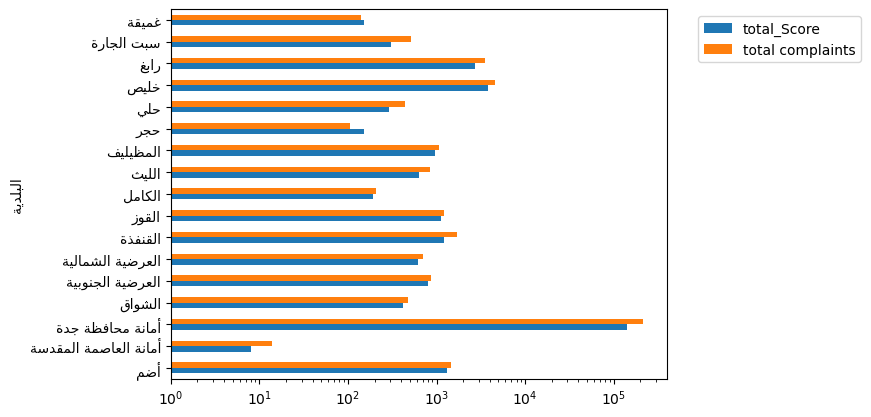

In [209]:


score_m = jeddah.groupby(['البلدية'])['total_Score'].sum()
count_ca = jeddah.groupby(['البلدية']).count()['الأمانة']

Plot = pd.merge(score_m, count_ca, on='البلدية').reset_index()
Plot.head()

cat = render_arabic('البلدية')
Plot['البلدية'] = Plot['البلدية'].apply(render_arabic)
Plot = Plot.rename(columns={'البلدية': cat})
Plot = Plot.rename(columns={'الأمانة': 'total complaints'})


ax = Plot.plot(kind='barh', x=cat, log=True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

WE SEE that there is no difference between the البلدية i will foucs in المحاور

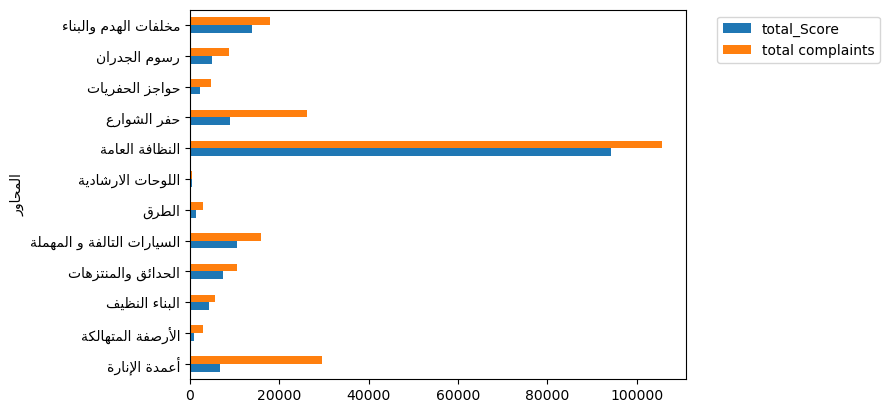

In [210]:


score_m = jeddah.groupby(['المحاور'])['total_Score'].sum()
count_ca = jeddah.groupby(['المحاور']).count()['الأمانة']

Plot = pd.merge(score_m, count_ca, on='المحاور').reset_index()
Plot.head()

cat = render_arabic('المحاور')
Plot['المحاور'] = Plot['المحاور'].apply(render_arabic)
Plot = Plot.rename(columns={'المحاور': cat})
Plot = Plot.rename(columns={'الأمانة': 'total complaints'})


ax = Plot.plot(kind='barh', x=cat)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

there is issue in النظافه العامة - حفر الشوارع - اعمدة الانارة

<Axes: xlabel='تاريخ الإغلاق', ylabel='total_Score'>

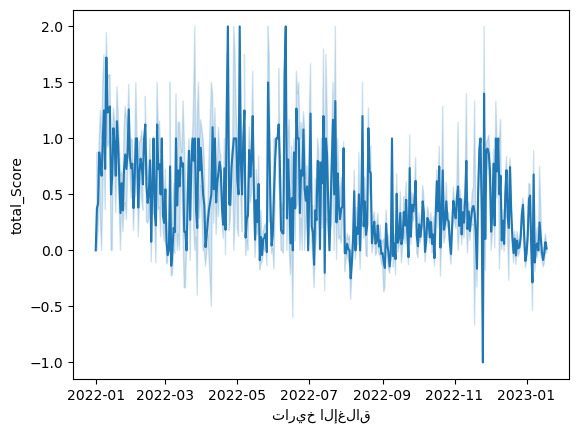

In [211]:
cat = jeddah[jeddah['المحاور']=='أعمدة الإنارة']
sns.lineplot(data=cat, x="تاريخ الإغلاق", y="total_Score")


<Axes: xlabel='تاريخ الإغلاق', ylabel='total_Score'>

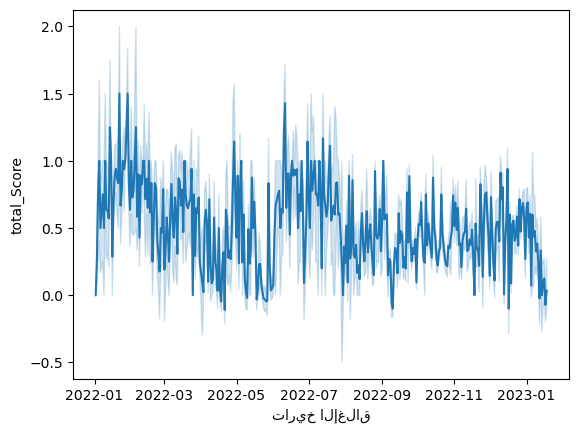

In [212]:
cat = jeddah[jeddah['المحاور']=='حفر الشوارع']
sns.lineplot(data=cat, x="تاريخ الإغلاق", y="total_Score")


<Axes: xlabel='تاريخ الإغلاق', ylabel='total_Score'>

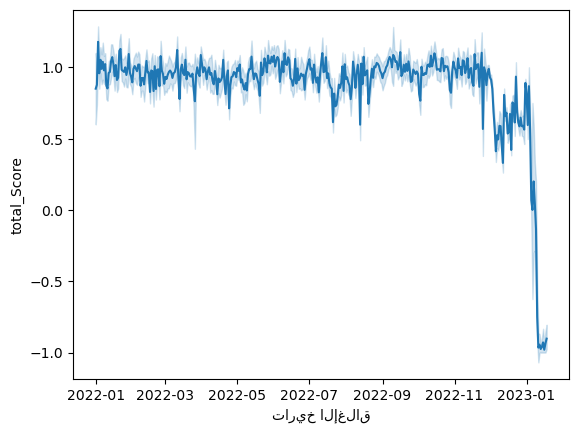

In [213]:
cat = jeddah[jeddah['المحاور']=='النظافة العامة']
sns.lineplot(data=cat, x="تاريخ الإغلاق", y="total_Score")


In [223]:
q1 = jeddah[jeddah['المحاور']== 'حفر الشوارع']
q2=jeddah[jeddah['المحاور']== 'النظافة العامة']
q3=jeddah[jeddah['المحاور']== 'أعمدة الإنارة']

display(q1['التصنيف التخصصي'].value_counts().head(1))
display(q2['التصنيف التخصصي'].value_counts().head(1))
display(q3['التصنيف التخصصي'].value_counts().head(1))

اصلاح الحفر و صيانة المطبات    10512
Name: التصنيف التخصصي, dtype: int64

نفايات او مبعثرات بالشارع    41222
Name: التصنيف التخصصي, dtype: int64

صيانة اعمدة انارة    23144
Name: التصنيف التخصصي, dtype: int64

In [214]:
jeddah = Scoring[Scoring['الأمانة']=='أمانة محافظة جدة']
gr = jeddah.groupby('البلدية')['dur_day'].mean()
gr

البلدية
أضم                  2.788501
أمانة محافظة جدة    27.164958
الشواق               5.116034
العرضية الجنوبية     4.099885
العرضية الشمالية     4.184136
القنفذة             12.161712
القوز                3.276999
الكامل               1.673171
الليث                5.830189
المظيليف             6.382353
حجر                  1.567308
حلي                 16.080899
خليص                 2.863895
رابغ                 2.656699
سبت الجارة          24.530769
غميقة                2.307143
Name: dur_day, dtype: float64

سبت الجارة          24.530769
small city and takes long time !!

In [215]:
sbt = jeddah[jeddah['البلدية']=='سبت الجارة']
sbt.groupby('المحاور')['dur_day'].mean()

المحاور
أعمدة الإنارة                   4.500000
البناء النظيف                 104.500000
الحدائق والمنتزهات             22.375000
السيارات التالفة و المهملة     75.000000
الطرق                          37.000000
النظافة العامة                 22.730978
حفر الشوارع                    26.208333
حواجز الحفريات                 33.416667
رسوم الجدران                    7.000000
مخلفات الهدم والبناء           56.000000
Name: dur_day, dtype: float64

In [216]:
jeddah[jeddah['البلدية']=='أمانة محافظة جدة'].groupby('المحاور')['dur_day'].mean()

المحاور
أعمدة الإنارة                 83.363001
الأرصفة المتهالكة             75.807397
البناء النظيف                 10.893587
الحدائق والمنتزهات            13.063861
السيارات التالفة و المهملة    14.208513
الطرق                         64.206349
اللوحات الارشادية             15.677201
النظافة العامة                 3.718167
حفر الشوارع                   72.804423
حواجز الحفريات                59.341975
رسوم الجدران                  36.225354
مخلفات الهدم والبناء           9.754543
Name: dur_day, dtype: float64

!!! small city and takes more than 10x more time !!

there is issue in سبت الجارة it should stakeholder should investigate with them to determine where is the issue. maybe there is no worker enough or they didnt now how to deal with technology so the are delayed

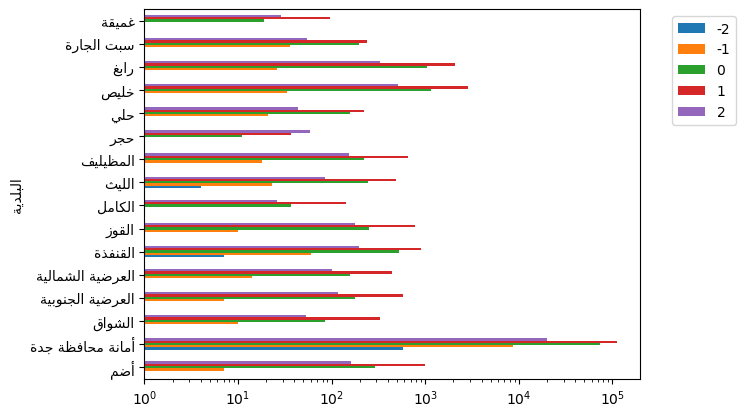

In [217]:
P = jeddah.groupby(['البلدية', 'total_Score']).size().unstack()
P =P.reset_index()

munc = render_arabic('البلدية')

P['البلدية'] = P['البلدية'].apply(render_arabic)

P = P.rename(columns={'البلدية': munc})


ax = P.plot(kind='barh',x=munc,log=True,)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()








### now i will foucs in Eastern department

In [218]:
eastern = Scoring[Scoring['الأمانة']=='أمانة المنطقة الشرقية']
eastern['المحاور'].value_counts()

النظافة العامة                16441
حفر الشوارع                   11462
أعمدة الإنارة                  3509
مخلفات الهدم والبناء           2695
الأرصفة المتهالكة              2232
حواجز الحفريات                 2017
الحدائق والمنتزهات             1892
الطرق                          1326
السيارات التالفة و المهملة     1309
البناء النظيف                  1288
اللوحات الارشادية               429
رسوم الجدران                    412
Name: المحاور, dtype: int64

In [219]:
gr = eastern.groupby('البلدية')['dur_day'].mean()
gr

البلدية
أمانة المنطقة الشرقية     76.285081
البقيق                    77.536449
الجبيل                    65.340171
الخفجي                    80.084984
الرفيعة                   35.684564
الصرار                    88.682927
القطيف                    80.401011
القليب                   126.465116
اللهابة                   79.000000
النعيرية                 110.705167
راس تنورة                 91.902778
عين دار                   78.442623
قرية العليا               91.636364
مليجة                     48.510204
هجر جوف بنى هاجر         106.450980
Name: dur_day, dtype: float64

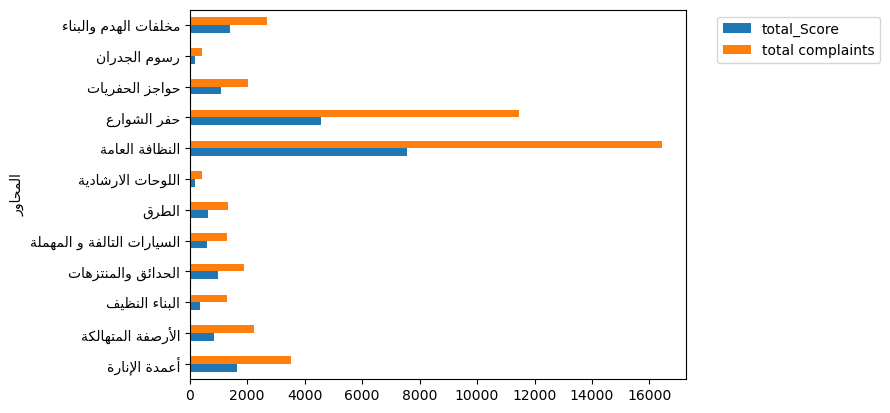

In [220]:


score_m = eastern.groupby(['المحاور'])['total_Score'].sum()
count_ca = eastern.groupby(['المحاور']).count()['الأمانة']

Plot = pd.merge(score_m, count_ca, on='المحاور').reset_index()
Plot.head()

cat = render_arabic('المحاور')
Plot['المحاور'] = Plot['المحاور'].apply(render_arabic)
Plot = Plot.rename(columns={'المحاور': cat})
Plot = Plot.rename(columns={'الأمانة': 'total complaints'})


ax = Plot.plot(kind='barh', x=cat)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

intersting to notice that eastern working so bad 

<Axes: xlabel='تاريخ الإغلاق', ylabel='dur_day'>

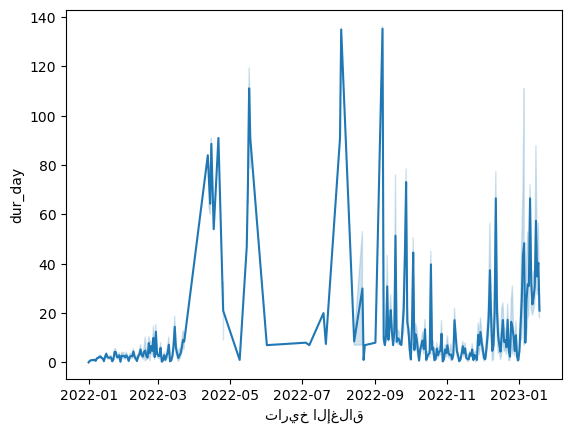

In [222]:
sns.lineplot(data=eastern, x="تاريخ الإغلاق", y="dur_day")
